In [ ]:
import keras
import numpy as np 
import pandas as pd 
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import os
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split
from torchvision.transforms import Compose, ToTensor, Resize
from torch.utils.data import DataLoader
from torch.nn.functional import normalize
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import cv2
import shutil
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import load_img
import time
from tqdm import tqdm
from sklearn.metrics import f1_score
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.listdir()

['.config', 'drive', 'sample_data']

In [ ]:
%cd drive/My Drive
%cd UTA/5334/Project

/content/drive/My Drive
/content/drive/My Drive/UTA/5334/Project


In [ ]:
# This Block of code has been used from url mentioned below and modified as per my use in the project
# [1] Reference: (https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py)
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_Training_info(dataloaders):
  # get some random training images
  dataiter = iter(dataloaders['train']) # Modification to map dataloader
  images, labels = next(dataiter)
  
  # show images
  imshow(torchvision.utils.make_grid(images))
  # print labels
  print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
# This block of code is used from the reference [2], I have modified it to make functions and call them accordingly in different function.
# [2] Reference : (https://discuss.pytorch.org/t/how-to-split-dataset-into-test-and-validation-sets/33987/4)
def train_val_dataset(dataset, val_split=0.20):
    train_idx, val_idx = train_test_split(list(range(len(dataset))), test_size=val_split)
    datasets = {}
    datasets['train'] = Subset(dataset, train_idx)
    datasets['val'] = Subset(dataset, val_idx)
    return datasets
    
def create_aug_dataset(datasetFolder,augmentationList):
  dataset = ImageFolder(datasetFolder,transform=Compose(augmentationList))
  return dataset

In [ ]:
class Model1Net(nn.Module): #[1]**
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 6) # Modification to Hyper-Parameters 
        self.pool = nn.AdaptiveAvgPool2d(6)
        self.conv2 = nn.Conv2d(16, 32, 6) # Modification to Hyper-Parameters
        self.fc1 = nn.Linear(32 * 6 * 6, 120) # Modification to Hyper-Parameters
        self.fc2 = nn.Linear(120, 60) # Modification to Hyper-Parameters
        self.fc3 = nn.Linear(60, 6) # Modification to Hyper-Parameters

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class Model2Net(nn.Module): #[1]**
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 6) # Modification to Hyper-Parameters 
        self.pool = nn.AdaptiveAvgPool2d(6)
        self.conv2 = nn.Conv2d(6, 12, 6) # Modification to Hyper-Parameters
        self.conv3 = nn.Conv2d(12, 24, 6) # Modification to Hyper-Parameters
        self.conv4 = nn.Conv2d(24, 48, 6) # Modification to Hyper-Parameters
        self.conv5 = nn.Conv2d(48, 96, 6) # Modification to Hyper-Parameters
        self.fc1 = nn.Linear(96 * 6 * 6, 160) # Modification to Hyper-Parameters
        self.fc2 = nn.Linear(160, 60) # Modification to Hyper-Parameters
        self.fc3 = nn.Linear(60, 6) # Modification to Hyper-Parameters

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
class Model3Net(nn.Module): #[1]**
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 6) # Modification to Hyper-Parameters 
        self.pool = nn.AdaptiveAvgPool2d(6) # Modification 
        self.conv2 = nn.Conv2d(6, 12, 6) # Modification to Hyper-Parameters
        self.conv3 = nn.Conv2d(12, 24, 6) # Modification to Hyper-Parameters
        self.conv4 = nn.Conv2d(24, 48, 6) # Addition of layer
        self.conv5 = nn.Conv2d(48, 96, 6) # Addition of layer
        self.conv6 = nn.Conv2d(96, 192, 6) # Addition of layer
        self.conv7 = nn.Conv2d(192, 384, 6) # Addition of layer
        self.conv8 = nn.Conv2d(384, 768, 6) # Addition of layer
        self.fc1 = nn.Linear(768 * 6 * 6, 512) # Modification to Hyper-Parameters
        self.fc2 = nn.Linear(512, 256) # Modification to Hyper-Parameters
        self.fc3 = nn.Linear(256, 128) # Modification to Hyper-Parameters
        self.fc4 = nn.Linear(128, 6) # Addition of layer

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        x = self.pool(F.relu(self.conv6(x)))
        x = self.pool(F.relu(self.conv7(x)))
        x = self.pool(F.relu(self.conv8(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x)) # Modification 
        x = self.fc4(x)
        return x

''' train_model() is using basic code template used in reference [1], I have modified it take values as parameters like, 
no - counter
optim_val - select Optimizer - SGD or Adam
learningRate  - learningRate for optimizer
epochs - number of epochs
net - Four models used here
dataloaders - Dataset 
'''
# Referenced code is marked as [1] at the start and end
# Modeified block is marked as [1]**
def train_model(no,optim_val,learningRate,epochs,net,dataloaders): ## Custom code to select optimizer and learning rate and start time of training model
  criterion = nn.CrossEntropyLoss()
  #lets use different optimizers like SGD and Adam
  if optim_val == "SGD":
    optimizer = optim.SGD(net.parameters(), lr=float(learningRate), momentum=0.9)
  elif optim_val == "ADAM":
    optimizer = optim.Adam(net.parameters(), lr=float(learningRate))

  starttime = "model"+str(no)+"starttime"
  endtime = "model"+str(no)+"endtime"
  modeltime = "model"+str(no)+"trainingtime"
  starttime = time.time() # Custom code ends here
  # let's run for n epochs 
  for epoch in range(epochs):  # [1]Start 

      running_loss = 0.0
      for i, data in enumerate(dataloaders['train'], 0): # Modification to map dataloader
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data
          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs) # Modification to map to Model 1 
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 100 == 99:    # print every 100 mini-batches
              print(f'[epoch : {epoch + 1}, mini-batches : {i + 1:5d}] loss: {running_loss / 100:.3f}') #modified code 
              running_loss = 0.0 #[1]End
  # Custom code to calculate trining time of model
  endtime = time.time()
  modeltime = endtime-starttime
  print('Finished Training Model ',no)
  print('Training Time for Model',no,' :',modeltime)
  print('==========================================')
  model_accuracy = "model"+str(no)+"accuracy"
  # Custom code ends here
  # [1] Start
  correct = 0
  total = 0
  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      for data in dataloaders['val']: # Modification to map dataloader
          images, labels = data
          # calculate outputs by running images through the network
          outputs = net(images)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  model_accuracy = 100 * correct // total
  print("Accuracy of the ",no," Network on the validation images:", model_accuracy ,'%')
  correct_pred = {classname: 0 for classname in classes}
  total_pred = {classname: 0 for classname in classes}
  print('==========================================')
  # again no gradients needed
  with torch.no_grad():
      for data in dataloaders['val']: # Modification to map dataloader
          images, labels = data
          outputs = net(images)
          _, predictions = torch.max(outputs, 1)
          # collect the correct predictions for each class
          for label, prediction in zip(labels, predictions):
              if label == prediction:
                  correct_pred[classes[label]] += 1
              total_pred[classes[label]] += 1
  # [1] End
  # [1]** Start modification done to plot bar graph 
  print("=============Plot graph for model ",no,"=============")
  plt.figure()
  # print accuracy for each class
  for classname, correct_count in correct_pred.items():
      class_accuracy = 100 * float(correct_count) / total_pred[classname]
      print(f'Accuracy for class: {classname:5s} is {class_accuracy:.1f} %')
      # Plot graph for each class Airplane, Motorbikes, Schooner

      plt.title("Model Perdiction Accuracy for each class")
      plt.xlabel("Class")
      plt.ylabel("Accuracy")
      plt.bar(classname, class_accuracy)
  plt.show()
  print('==========================================')
  return [modeltime,model_accuracy]
  # [1]** End 

In [ ]:
# Custom code to Plot graph for all the models and training run time
def plot_graph(modelresult):
  print("Model Accuracy Graph")
  model = ["Model 0","Model 1","Model 2","Model 3"]
  plt.figure()
  for acc in range(len(modelresult)):
    plt.title("Model Perdiction Accuracy")
    plt.xlabel("Model")
    plt.ylabel("Accuracy")
    plt.bar(model[acc], modelresult[acc][1])
  plt.show()
  print("Model Run Time Graph")
  plt.figure()
  for acc in range(len(modelresult)):
    plt.title("Model Training Run Time")
    plt.xlabel("Model")
    plt.ylabel("Accuracy")
    plt.bar(model[acc], modelresult[acc][0])
  plt.show()

img_data_dir:  Data
Total Number of Images of different class:
# of cheetah: 342
# of fox: 250
# of hyena: 305
# of lion: 294
# of tiger: 269
# of wolf: 263
=============Iteration  0 =============
Augmentation Iteration 0 Image Augmentation parameters [Resize(size=(300, 300), interpolation=bilinear, max_size=None, antialias=None), ToTensor()]
Total Number of Images 1723
Total Number of Images in Training Dataset  1378
Total Number of Images in Validation Dataset  345
Dataset Information  Dataset ImageFolder
    Number of datapoints: 1723
    Root location: Data
    StandardTransform
Transform: Compose(
               Resize(size=(300, 300), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )
x torch.Size([5, 3, 300, 300]) y torch.Size([5])


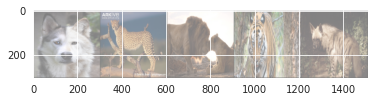

wolf  cheetah lion  tiger hyena
[epoch : 1, mini-batches :   100] loss: 1.888


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[epoch : 1, mini-batches :   200] loss: 1.814
[epoch : 2, mini-batches :   100] loss: 1.807
[epoch : 2, mini-batches :   200] loss: 1.790
[epoch : 3, mini-batches :   100] loss: 1.779
[epoch : 3, mini-batches :   200] loss: 1.752
[epoch : 4, mini-batches :   100] loss: 1.739
[epoch : 4, mini-batches :   200] loss: 1.697
[epoch : 5, mini-batches :   100] loss: 1.679
[epoch : 5, mini-batches :   200] loss: 1.664
[epoch : 6, mini-batches :   100] loss: 1.652
[epoch : 6, mini-batches :   200] loss: 1.688
[epoch : 7, mini-batches :   100] loss: 1.620
[epoch : 7, mini-batches :   200] loss: 1.644
[epoch : 8, mini-batches :   100] loss: 1.613
[epoch : 8, mini-batches :   200] loss: 1.611
[epoch : 9, mini-batches :   100] loss: 1.568
[epoch : 9, mini-batches :   200] loss: 1.588
[epoch : 10, mini-batches :   100] loss: 1.523
[epoch : 10, mini-batches :   200] loss: 1.520
[epoch : 11, mini-batches :   100] loss: 1.391
[epoch : 11, mini-batches :   200] loss: 1.491
[epoch : 12, mini-batches :   

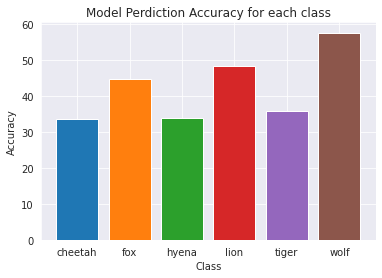

[epoch : 1, mini-batches :   100] loss: 1.977
[epoch : 1, mini-batches :   200] loss: 1.826
[epoch : 2, mini-batches :   100] loss: 1.816
[epoch : 2, mini-batches :   200] loss: 1.804
[epoch : 3, mini-batches :   100] loss: 1.802
[epoch : 3, mini-batches :   200] loss: 1.808
[epoch : 4, mini-batches :   100] loss: 1.796
[epoch : 4, mini-batches :   200] loss: 1.802
[epoch : 5, mini-batches :   100] loss: 1.801
[epoch : 5, mini-batches :   200] loss: 1.803
[epoch : 6, mini-batches :   100] loss: 1.797
[epoch : 6, mini-batches :   200] loss: 1.793
[epoch : 7, mini-batches :   100] loss: 1.793
[epoch : 7, mini-batches :   200] loss: 1.804
[epoch : 8, mini-batches :   100] loss: 1.803
[epoch : 8, mini-batches :   200] loss: 1.797
[epoch : 9, mini-batches :   100] loss: 1.796
[epoch : 9, mini-batches :   200] loss: 1.797
[epoch : 10, mini-batches :   100] loss: 1.790
[epoch : 10, mini-batches :   200] loss: 1.796
[epoch : 11, mini-batches :   100] loss: 1.795
[epoch : 11, mini-batches :   2

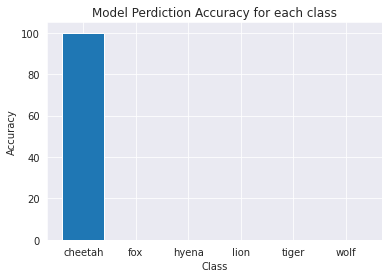

[epoch : 1, mini-batches :   100] loss: 1.946
[epoch : 1, mini-batches :   200] loss: 1.830
[epoch : 2, mini-batches :   100] loss: 1.813
[epoch : 2, mini-batches :   200] loss: 1.804
[epoch : 3, mini-batches :   100] loss: 1.804
[epoch : 3, mini-batches :   200] loss: 1.787
[epoch : 4, mini-batches :   100] loss: 1.799
[epoch : 4, mini-batches :   200] loss: 1.797
[epoch : 5, mini-batches :   100] loss: 1.801
[epoch : 5, mini-batches :   200] loss: 1.799
[epoch : 6, mini-batches :   100] loss: 1.798
[epoch : 6, mini-batches :   200] loss: 1.793
[epoch : 7, mini-batches :   100] loss: 1.795
[epoch : 7, mini-batches :   200] loss: 1.798
[epoch : 8, mini-batches :   100] loss: 1.794
[epoch : 8, mini-batches :   200] loss: 1.799
[epoch : 9, mini-batches :   100] loss: 1.796
[epoch : 9, mini-batches :   200] loss: 1.792
[epoch : 10, mini-batches :   100] loss: 1.791
[epoch : 10, mini-batches :   200] loss: 1.798
[epoch : 11, mini-batches :   100] loss: 1.795
[epoch : 11, mini-batches :   2

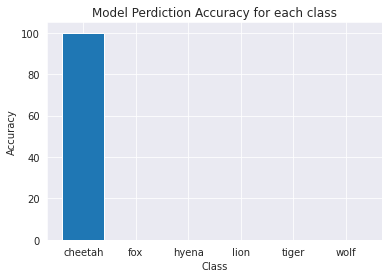

Model Accuracy Graph


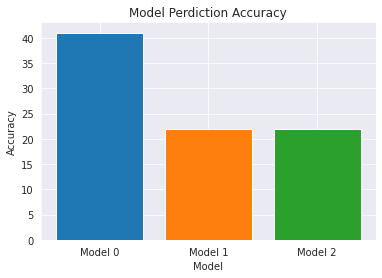

Model Run Time Graph


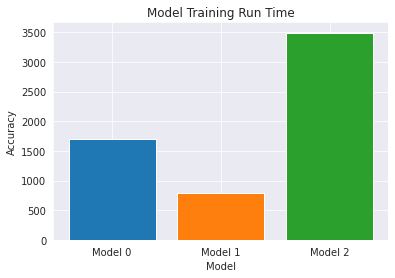

=============Iteration  1 =============
Augmentation Iteration 1 Image Augmentation parameters [Resize(size=(300, 300), interpolation=bilinear, max_size=None, antialias=None), GaussianBlur(kernel_size=(1, 1), sigma=(0.1, 0.5)), RandomRotation(degrees=[-5.0, 5.0], interpolation=nearest, expand=False, fill=0), RandomHorizontalFlip(p=0.5), ToTensor()]
Total Number of Images 1723
Total Number of Images in Training Dataset  1378
Total Number of Images in Validation Dataset  345
Dataset Information  Dataset ImageFolder
    Number of datapoints: 1723
    Root location: Data
    StandardTransform
Transform: Compose(
               Resize(size=(300, 300), interpolation=bilinear, max_size=None, antialias=None)
               GaussianBlur(kernel_size=(1, 1), sigma=(0.1, 0.5))
               RandomRotation(degrees=[-5.0, 5.0], interpolation=nearest, expand=False, fill=0)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
x torch.Size([5, 3, 300, 300]) y torch.Size([5

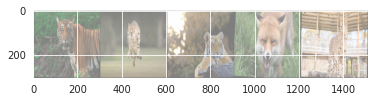

tiger cheetah tiger fox   cheetah
[epoch : 1, mini-batches :   100] loss: 1.887
[epoch : 1, mini-batches :   200] loss: 1.818
[epoch : 2, mini-batches :   100] loss: 1.774
[epoch : 2, mini-batches :   200] loss: 1.766
[epoch : 3, mini-batches :   100] loss: 1.684
[epoch : 3, mini-batches :   200] loss: 1.712
[epoch : 4, mini-batches :   100] loss: 1.691
[epoch : 4, mini-batches :   200] loss: 1.639
[epoch : 5, mini-batches :   100] loss: 1.662
[epoch : 5, mini-batches :   200] loss: 1.584
[epoch : 6, mini-batches :   100] loss: 1.600
[epoch : 6, mini-batches :   200] loss: 1.558
[epoch : 7, mini-batches :   100] loss: 1.558
[epoch : 7, mini-batches :   200] loss: 1.520
[epoch : 8, mini-batches :   100] loss: 1.491
[epoch : 8, mini-batches :   200] loss: 1.516
[epoch : 9, mini-batches :   100] loss: 1.506
[epoch : 9, mini-batches :   200] loss: 1.478
[epoch : 10, mini-batches :   100] loss: 1.409
[epoch : 10, mini-batches :   200] loss: 1.380
[epoch : 11, mini-batches :   100] loss: 1.3

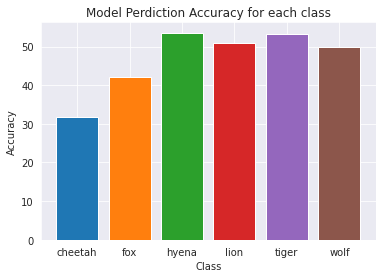

[epoch : 1, mini-batches :   100] loss: 1.946
[epoch : 1, mini-batches :   200] loss: 1.816
[epoch : 2, mini-batches :   100] loss: 1.809
[epoch : 2, mini-batches :   200] loss: 1.802
[epoch : 3, mini-batches :   100] loss: 1.811
[epoch : 3, mini-batches :   200] loss: 1.786
[epoch : 4, mini-batches :   100] loss: 1.796
[epoch : 4, mini-batches :   200] loss: 1.794
[epoch : 5, mini-batches :   100] loss: 1.795
[epoch : 5, mini-batches :   200] loss: 1.803
[epoch : 6, mini-batches :   100] loss: 1.796
[epoch : 6, mini-batches :   200] loss: 1.795
[epoch : 7, mini-batches :   100] loss: 1.791
[epoch : 7, mini-batches :   200] loss: 1.796
[epoch : 8, mini-batches :   100] loss: 1.798
[epoch : 8, mini-batches :   200] loss: 1.794
[epoch : 9, mini-batches :   100] loss: 1.798
[epoch : 9, mini-batches :   200] loss: 1.796
[epoch : 10, mini-batches :   100] loss: 1.788
[epoch : 10, mini-batches :   200] loss: 1.794
[epoch : 11, mini-batches :   100] loss: 1.785
[epoch : 11, mini-batches :   2

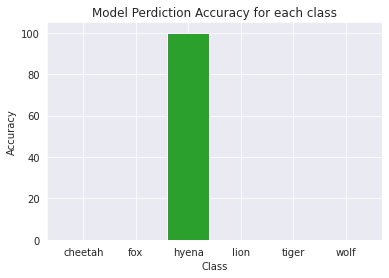

[epoch : 1, mini-batches :   100] loss: 2.038
[epoch : 1, mini-batches :   200] loss: 1.826
[epoch : 2, mini-batches :   100] loss: 1.812
[epoch : 2, mini-batches :   200] loss: 1.802
[epoch : 3, mini-batches :   100] loss: 1.797
[epoch : 3, mini-batches :   200] loss: 1.812
[epoch : 4, mini-batches :   100] loss: 1.795
[epoch : 4, mini-batches :   200] loss: 1.795
[epoch : 5, mini-batches :   100] loss: 1.798
[epoch : 5, mini-batches :   200] loss: 1.796
[epoch : 6, mini-batches :   100] loss: 1.796
[epoch : 6, mini-batches :   200] loss: 1.784
[epoch : 7, mini-batches :   100] loss: 1.791
[epoch : 7, mini-batches :   200] loss: 1.798
[epoch : 8, mini-batches :   100] loss: 1.792
[epoch : 8, mini-batches :   200] loss: 1.798
[epoch : 9, mini-batches :   100] loss: 1.792
[epoch : 9, mini-batches :   200] loss: 1.788
[epoch : 10, mini-batches :   100] loss: 1.791
[epoch : 10, mini-batches :   200] loss: 1.793
[epoch : 11, mini-batches :   100] loss: 1.787
[epoch : 11, mini-batches :   2

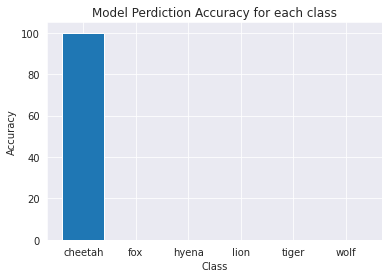

Model Accuracy Graph


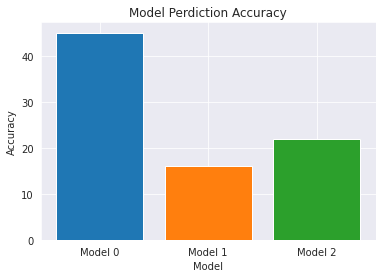

Model Run Time Graph


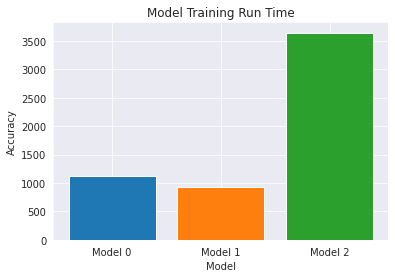

In [ ]:
# This block of code uses few line of code from reference [2], I have modified it to make functions and call them accordingly in different function.

''' 
Custom code to load the data and apply various attributes like
augmentationList - Tranformation parameters of images,
learningRate - learning rate for optimizer
batch_size - batch size
epoch_val - no of epochs

Then pass these attributes to create_aug_dataset() to create dataset and to train_model() for training and validation of model 
Plot accuracy graph for each class along with model and training time graph for all the models
'''

import os
img_data_dir = 'Data'
print("img_data_dir: ",img_data_dir)
print("Total Number of Images of different class:")
print("# of cheetah:",len(os.listdir(os.path.join(img_data_dir,'cheetah-resize-512/resize-512'))))
print("# of fox:",len(os.listdir(os.path.join(img_data_dir,'fox-resize-512/fox-resize-512'))))
print("# of hyena:",len(os.listdir(os.path.join(img_data_dir,'hyena-resize-512/resize-512'))))
print("# of lion:",len(os.listdir(os.path.join(img_data_dir,'lion-resize-512/lion-resize-512'))))
print("# of tiger:",len(os.listdir(os.path.join(img_data_dir,'tiger-resize-512/tiger-resize-512'))))
print("# of wolf:",len(os.listdir(os.path.join(img_data_dir,'wolf-resize-512/wolf-resize-512'))))

learningRate = 0.001
batch_size = 5
epoch_val = 15
# sample 1: augmentationList = [transforms.Resize((300,300)),transforms.GaussianBlur(1,sigma=(0.1,0.5)),transforms.RandomRotation(5),transforms.RandomHorizontalFlip(),transforms.ToTensor()]
# sample 2: augmentationList = [Resize((240,240)),ToTensor()]
augmentationList = [[transforms.Resize((300,300)),ToTensor()],
                    [transforms.Resize((300,300)),transforms.GaussianBlur(1,sigma=(0.1,0.5)),transforms.RandomRotation(5),
                     transforms.RandomHorizontalFlip(),transforms.ToTensor()]]

# Take batch size from user
for auglist in range(len(augmentationList)):
  print("=============Iteration ",auglist,"=============")
  print("Augmentation Iteration",auglist,"Image Augmentation parameters",augmentationList[auglist])
  dataset = create_aug_dataset(img_data_dir,augmentationList[auglist])
  print("Total Number of Images",len(dataset))
  datasets = train_val_dataset(dataset)
  print("Total Number of Images in Training Dataset ",len(datasets['train']))
  print("Total Number of Images in Validation Dataset ",len(datasets['val']))
  print("Dataset Information ",datasets['train'].dataset)

  dataloaders = {x:DataLoader(datasets[x],batch_size, shuffle=True) for x in ['train','val']}
  x,y = next(iter(dataloaders['train']))
  print("x",x.shape,"y", y.shape)

  classes = ('cheetah', 'fox', 'hyena','lion','tiger', 'wolf')

  accuracy_time_list= list()
  show_Training_info(dataloaders)
  nnList = [Model1Net(),Model2Net(),Model3Net()]
  for n in range(len(nnList)):
    net = nnList[n]
    accuracy_time_list.append(train_model(n,"ADAM",learningRate,epoch_val,net,dataloaders))
  plot_graph(accuracy_time_list)

In [ ]:
import pathlib
import tensorflow as tf

In [ ]:
os.listdir()

['test', 'Data', 'wildanimals.zip']

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'Data', image_size=(300, 300), batch_size=1723
)
for data, labels in dataset.take(1):
    print(data.shape)
    print(labels)
x = np.concatenate([x for x, y in dataset], axis=0)
y = np.concatenate([y for x, y in dataset], axis=0)


Found 1723 files belonging to 6 classes.
(1723, 300, 300, 3)
tf.Tensor([5 4 4 ... 5 1 3], shape=(1723,), dtype=int32)


In [ ]:
from sklearn.model_selection import train_test_split
sk_train_x, sk_val_x, sk_train_y, sk_val_y = train_test_split(x, y, test_size=0.20)

In [ ]:
print(sk_train_x.shape)
print(sk_train_y.shape)
print(sk_val_x.shape)
print(sk_val_y.shape)

(1378, 300, 300, 3)
(1378,)
(345, 300, 300, 3)
(345,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

correct = 0
model=RandomForestClassifier(n_estimators=20, max_depth=8, random_state=2)
nsamples, nx, ny, nrgb = sk_train_x.shape
sk_train_x = sk_train_x.reshape((nsamples,nx*ny*nrgb))
rfcstarttime = time.time()
model.fit(sk_train_x, sk_train_y)
rfcendtime = time.time()
nsamples, nx, ny, nrgb = sk_val_x.shape
sk_val_x = sk_val_x.reshape((nsamples,nx*ny*nrgb))

predictions = model.predict(sk_val_x)

for labels, prediction in zip(predictions, sk_val_y):
    if labels == prediction:
        correct += 1
rfcaccuracy = correct/sk_val_y.shape[0]
rfcruntime = rfcendtime-rfcstarttime
print("Accuracy ",rfcaccuracy)
print("Train Time ",rfcruntime)

Accuracy  0.17681159420289855
Train Time  12.805390119552612


In [ ]:
from sklearn.svm import SVC

correct = 0
model=SVC()
nsamples, nx, ny, nrgb = sk_train_x.shape
sk_train_x = sk_train_x.reshape((nsamples,nx*ny*nrgb))
svmstarttime = time.time()
model.fit(sk_train_x, sk_train_y)
svmendtime = time.time()
nsamples, nx, ny, nrgb = sk_val_x.shape
sk_val_x = sk_val_x.reshape((nsamples,nx*ny*nrgb))

predictions = model.predict(sk_val_x)

for labels, prediction in zip(predictions, sk_val_y):
    if labels == prediction:
        correct += 1
svmaccuracy = correct/sk_val_y.shape[0]
svmruntime = svmendtime-svmstarttime
print("Accuracy ",svmaccuracy)
print("Train Time ",svmruntime)

Accuracy  0.17391304347826086
Train Time  842.5758893489838


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

correct = 0
model=KNeighborsClassifier()
nsamples, nx, ny, nrgb = sk_train_x.shape
sk_train_x = sk_train_x.reshape((nsamples,nx*ny*nrgb))
knnstarttime = time.time()
model.fit(sk_train_x, sk_train_y)
knnendtime = time.time()
nsamples, nx, ny, nrgb = sk_val_x.shape
sk_val_x = sk_val_x.reshape((nsamples,nx*ny*nrgb))

predictions = model.predict(sk_val_x)

for labels, prediction in zip(predictions, sk_val_y):
    if labels == prediction:
        correct += 1
knnaccuracy = correct/sk_val_y.shape[0]
knnruntime = knnendtime-knnstarttime
print("Accuracy ",knnaccuracy)
print("Train Time ",knnruntime)

Accuracy  0.1826086956521739
Train Time  0.41831302642822266


In [ ]:
from sklearn.naive_bayes import GaussianNB
correct = 0
model=GaussianNB()
nsamples, nx, ny, nrgb = sk_train_x.shape
sk_train_x = sk_train_x.reshape((nsamples,nx*ny*nrgb))
nbstarttime = time.time()
model.fit(sk_train_x, sk_train_y)
nbendtime = time.time()
nsamples, nx, ny, nrgb = sk_val_x.shape
sk_val_x = sk_val_x.reshape((nsamples,nx*ny*nrgb))

predictions = model.predict(sk_val_x)

for labels, prediction in zip(predictions, sk_val_y):
    if labels == prediction:
        correct += 1
nbaccuracy = correct/sk_val_y.shape[0]
nbruntime = nbendtime-nbstarttime
print("Accuracy ",nbaccuracy)
print("Train Time ",nbruntime)

Accuracy  0.14782608695652175
Train Time  3.2183287143707275


In [ ]:
from sklearn.tree import DecisionTreeClassifier

correct = 0
model=DecisionTreeClassifier()
nsamples, nx, ny, nrgb = sk_train_x.shape
sk_train_x = sk_train_x.reshape((nsamples,nx*ny*nrgb))
dtstarttime = time.time()
model.fit(sk_train_x, sk_train_y)
dtendtime = time.time()
nsamples, nx, ny, nrgb = sk_val_x.shape
sk_val_x = sk_val_x.reshape((nsamples,nx*ny*nrgb))

predictions = model.predict(sk_val_x)

for labels, prediction in zip(predictions, sk_val_y):
    if labels == prediction:
        correct += 1
dtaccuracy = correct/sk_val_y.shape[0]
dtruntime = dtendtime-dtstarttime
print("Accuracy ",dtaccuracy)
print("Train Time ",dtruntime)

Accuracy  0.15942028985507245
Train Time  824.522971868515


Model Accuracy Graph


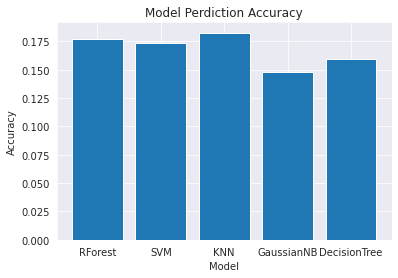

Model Run Time Graph


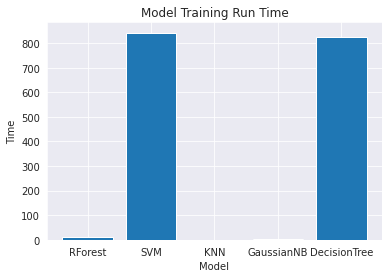

In [ ]:
print("Model Accuracy Graph")
model = ["RForest","SVM","KNN","GaussianNB","DecisionTree"]
plt.figure()
plt.title("Model Perdiction Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.bar(model,[rfcaccuracy,svmaccuracy,knnaccuracy,nbaccuracy,dtaccuracy])
plt.show()
print("Model Run Time Graph")
plt.figure()

plt.title("Model Training Run Time")
plt.xlabel("Model")
plt.ylabel("Time")
plt.bar(model, [rfcruntime,svmruntime,knnruntime,nbruntime,dtruntime])
plt.show()